In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
from datetime import date
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import skew
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from scipy import stats
import utility
from scipy import stats

In [2]:
# from sklearn.datasets import make_regression
# from sklearn.model_selection import cross_validate
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score, make_scorer

# def cus_scoring(y_pred, y_act):
#     score=stats.pearsonr(y_pred, y_act)[0]
#     return score

# X, y = make_regression(n_samples=200, n_features=3, noise=0.2)

# model = XGBRegressor(scale_pos_weight=9)

# scoring = {'mae' : 'neg_mean_absolute_error','mse':'neg_mean_squared_error','r square':'r2','Pearson':make_scorer(cus_scoring, greater_is_better=True)}

# # scores = cross_validate(model, X, y, scoring=make_scorer(cus_scoring, greater_is_better=True), cv=3, n_jobs=-1)
# scores = cross_validate(model, X, y, scoring=scoring, cv=3, n_jobs=-1)

# Zomato

In [3]:
# zomato only
df_zom = pd.read_csv('data/3_clean_zomato_feat_ori_sampling_train.csv')
# df_zom = pd.read_csv('data/3_jbdk_clean_zomato_feat.csv')

df_zom['rest_price_idr'] = df_zom['rest_price_idr'] / 1000
df_zom['rest_price_idr'] = df_zom['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac']

# ori 
drop_column = ['url','index','rating','lat','long','review']
target_column = 'rating'


# cross validation 

rf_param = {'n_estimators':500,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':3, 'learning_rate':0.15, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}


result_zomato_loop, result_zomato = utility.bulk_train_k_fold(df_input=df_zom, drop_column=drop_column, target_column=target_column, dataset_name='zomato_only', rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_loop['test_neg_mean_squared_error']= result_zomato_loop['test_neg_mean_squared_error']*-1
result_zomato_loop['test_neg_mean_absolute_error']= result_zomato_loop['test_neg_mean_absolute_error']*-1
result_zomato_loop['feature_size'] = len(df_zom.drop(drop_column, axis=1).columns)
result_zomato_loop['record'] = df_zom.drop(drop_column, axis=1).shape[0]
result_zomato_loop = result_zomato_loop.reset_index()

# Zomato 250 

In [5]:
# zomato geo 250
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_250_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_250.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']

target_column = 'rating'

# cross validation
rf_param = {'n_estimators':250,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':1, 'learning_rate':0.15, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}

result_zomato_250_loop,  result_zomato_250  = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_250',rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_250_loop['test_neg_mean_squared_error'] = result_zomato_250_loop['test_neg_mean_squared_error']*-1
result_zomato_250_loop['test_neg_mean_absolute_error'] = result_zomato_250_loop['test_neg_mean_absolute_error']*-1
result_zomato_250_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_250_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]

result_zomato_250_loop = result_zomato_250_loop.reset_index()

# Zomato 500 

In [6]:
# zomato geo 500
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_500_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_500.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)


# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']

# cross validation
rf_param = {'n_estimators':500,'max_features':3, 'max_depth':30,'bootstrap':True}
xgb_param = {'n_estimators':100, 'max_depth':5, 'min_child_weight':3, 'learning_rate':0.2, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':0.1}

result_zomato_500_loop,  result_zomato_500 = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_500', rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_500_loop['test_neg_mean_squared_error'] = result_zomato_500_loop['test_neg_mean_squared_error']*-1
result_zomato_500_loop['test_neg_mean_absolute_error'] = result_zomato_500_loop['test_neg_mean_absolute_error']*-1
result_zomato_500_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_500_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]

result_zomato_500_loop = result_zomato_500_loop.reset_index()

# Zomato 1000

In [7]:
# zomato geo 1000
df_zom_poi = pd.read_csv('data/3_clean_zomato_gof_ori_1000_sampling_train.csv')
# df_zom_poi = pd.read_csv('data/3_jbdk_clean_zomato_gof_1000.csv')
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'] / 1000
df_zom_poi['rest_price_idr'] = df_zom_poi['rest_price_idr'].astype(int)

# encode 
# drop_column = ['url','index','rating','lat','long','review','new_code_res_type','new_code_fac','geohash','encode']

# ori
drop_column = ['url','index','rating','lat','long','review','geohash','encode']
target_column = 'rating'

# cross validation
rf_param = {'n_estimators':250,'max_features':3, 'max_depth':250,'bootstrap':True}
xgb_param = {'n_estimators':1100, 'max_depth':2, 'min_child_weight':1, 'learning_rate':0.05, 'booster':'gbtree'}
svr_param  = {'kernel':'poly','gamma':0.1,'C':100}


result_zomato_1000_loop,  result_zomato_1000 = utility.bulk_train_k_fold(df_input=df_zom_poi, drop_column=drop_column, target_column=target_column, dataset_name='zomato_poi_1000',rf_param = rf_param, xgb_param=xgb_param, svr_param=svr_param)
result_zomato_1000_loop['test_neg_mean_squared_error'] = result_zomato_1000_loop['test_neg_mean_squared_error']*-1
result_zomato_1000_loop['test_neg_mean_absolute_error'] = result_zomato_1000_loop['test_neg_mean_absolute_error']*-1
result_zomato_1000_loop['feature_size'] = len(df_zom_poi.drop(drop_column, axis=1).columns)
result_zomato_1000_loop['record'] = df_zom_poi.drop(drop_column, axis=1).shape[0]


result_zomato_1000_loop = result_zomato_1000_loop.reset_index()

In [8]:
# cross validation 
df_total_result = pd.concat([result_zomato_loop,result_zomato_250_loop, result_zomato_500_loop, result_zomato_1000_loop])

# train and test 
df_total_normal = pd.concat([result_zomato , result_zomato_250, result_zomato_500, result_zomato_1000])

In [9]:
df_total_normal

,mae,mse,pearson,name,dataset,feature_size,train_size,test_size
0,0.059138,0.008204,0.936970,rf,zomato_only,42,6420,876
1,0.120972,0.022088,0.820734,xgb,zomato_only,42,6420,876
2,0.162217,0.039601,0.635610,svr,zomato_only,42,6420,876
0,0.058912,0.008039,0.937438,rf,zomato_poi_250,61,6420,876
1,0.110547,0.019136,0.844125,xgb,zomato_poi_250,61,6420,876
2,0.148716,0.034748,0.684913,svr,zomato_poi_250,61,6420,876
0,0.053745,0.006772,0.947396,rf,zomato_poi_500,61,6420,876
1,0.096405,0.015085,0.878284,xgb,zomato_poi_500,61,6420,876
2,0.152674,0.035766,0.673014,svr,zomato_poi_500,61,6420,876
0,0.052195,0.006389,0.951036,rf,zomato_poi_1000,61,6420,876


In [10]:
today = date.today()
print("Today's date:", today)

Today's date: 2022-11-23


In [11]:
df_total_result.to_excel('report/ml_perform_crossval_raw_samp_{}.xlsx'.format(today),index=False)
df_total_normal.to_excel('report/ml_perform_normal_samp_{}.xlsx'.format(today),index=False)

In [12]:
df_zom_poi.drop(drop_column, axis=1).columns

Index(['Unnamed: 0', 'rest_price_idr', 'is_chain', 'alcohol', 'delivery',
       'entertainment', 'indoor seating', 'kid friendly',
       'no alcohol available', 'others_facility', 'outdoor seating',
       'parking service', 'praying room', 'private dining area available',
       'self service', 'smoking area', 'special_meal', 'table booking',
       'table booking not available', 'table reservation required',
       'takeaway available', 'asian', 'bakery', 'beverages', 'cafe', 'coffee',
       'desserts', 'drink', 'fast_food', 'india', 'indonesia_traditional',
       'indonesian', 'melayu', 'mid_east', 'noodle', 'others_type', 'seafood',
       'snacks', 'special_food', 'street_food', 'tea', 'western',
       'd_1000_airport', 'd_1000_atm', 'd_1000_bank', 'd_1000_cafe',
       'd_1000_convenience_store', 'd_1000_gas_station', 'd_1000_hospital',
       'd_1000_lodging', 'd_1000_meal_takeaway', 'd_1000_mosque',
       'd_1000_park', 'd_1000_restaurant', 'd_1000_school', 'd_1000_store'

In [13]:
df_total_result.head()

,index,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2,test_Pearson,train_Pearson,name,dataset,feature_size,record
0,0,3.132813,0.160381,0.066993,-0.026744,0.010961,-0.001593,0.837993,0.975640,0.916371,0.988896,rf,zomato_only,42,7296
1,1,2.379203,0.220526,0.066373,-0.027020,0.009477,-0.001667,0.857383,0.974641,0.926762,0.988375,rf,zomato_only,42,7296
2,2,2.556258,0.233106,0.066811,-0.027246,0.009955,-0.001688,0.849853,0.974327,0.922863,0.988231,rf,zomato_only,42,7296
3,3,2.634378,0.141034,0.062458,-0.027644,0.008788,-0.001744,0.868194,0.973438,0.932678,0.987811,rf,zomato_only,42,7296
4,4,2.438561,0.141161,0.066961,-0.026741,0.009785,-0.001648,0.842401,0.975333,0.918570,0.988683,rf,zomato_only,42,7296


# Aggregate report 

In [14]:
df_total_result_agg = df_total_result.groupby(['name','dataset','feature_size']).agg({'test_neg_mean_absolute_error':['mean','std','median','var'],'test_neg_mean_squared_error':['mean','std','median','var'],'test_Pearson':['mean','std','median','var']}).reset_index()
df_total_result_agg.columns = ['name','dataset','feature_size','avg_mae','std_mae','med_mae','var_mae','avg_mse','std_mse','med_mse','var_mse','avg_pearson','std_pearson','med_pearson','var_pearson']

df_total_result_agg.to_excel('report/ml_perform_crossval_agg_samp_{}.xlsx'.format(today),index=False)

In [15]:
df_total_result_agg

,name,dataset,feature_size,avg_mae,std_mae,med_mae,var_mae,avg_mse,std_mse,med_mse,var_mse,avg_pearson,std_pearson,med_pearson,var_pearson
0,rf,zomato_only,42,0.065919,0.001950,0.066811,0.000004,0.009793,0.000791,0.009785,6.250186e-07,0.923449,0.006527,0.922863,0.000043
1,rf,zomato_poi_1000,61,0.063519,0.001781,0.062432,0.000003,0.009263,0.000349,0.009216,1.221165e-07,0.927236,0.005286,0.926483,0.000028
2,rf,zomato_poi_250,61,0.067260,0.001829,0.067833,0.000003,0.009519,0.000215,0.009618,4.607882e-08,0.925674,0.004951,0.926031,0.000025
3,rf,zomato_poi_500,61,0.063445,0.002484,0.063156,0.000006,0.008838,0.000585,0.009025,3.416683e-07,0.931619,0.006265,0.932854,0.000039
4,svr,zomato_only,42,0.160706,0.002150,0.161151,0.000005,0.039290,0.001015,0.039880,1.030570e-06,0.636845,0.016001,0.635248,0.000256
5,svr,zomato_poi_1000,61,0.136586,0.002350,0.137613,0.000006,0.032085,0.001825,0.032078,3.331068e-06,0.742893,0.017041,0.744150,0.000290
6,svr,zomato_poi_250,61,0.156905,0.003139,0.158266,0.000010,0.037569,0.001325,0.038172,1.756483e-06,0.653412,0.004537,0.651898,0.000021
7,svr,zomato_poi_500,61,0.154550,0.001509,0.154122,0.000002,0.036538,0.000880,0.036021,7.745381e-07,0.668320,0.008300,0.668091,0.000069
8,xgb,zomato_only,42,0.121389,0.002528,0.120692,0.000006,0.022463,0.001026,0.022297,1.053540e-06,0.815376,0.014419,0.820745,0.000208
9,xgb,zomato_poi_1000,61,0.137368,0.001100,0.137761,0.000001,0.028038,0.000810,0.028058,6.555723e-07,0.759342,0.014184,0.766518,0.000201


<AxesSubplot:title={'center':'Quality'}>

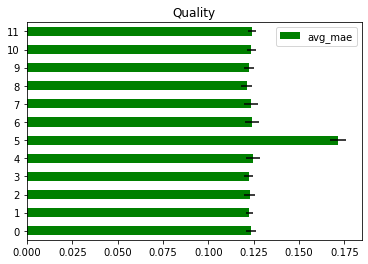

In [18]:
df_total_result_agg.plot(kind = "barh", y = "avg_mae", legend = True, xerr = "std_mae", title = "Quality", color='green')